In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [1]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Create a scikit-learn model
model = RandomForestClassifier()

# Train the model on your data

# Save the model to a file
joblib.dump(model, 'EL')

['EL']

## 1. Data Collection


In [2]:
def fetch_nasa_data(dataset_url):
    response = requests.get(dataset_url)
    data = pd.read_csv(StringIO(response.text))
    return data
# Simulating NASA data URLs (replace with actual NASA API endpoints when available)
nasa_urls = {
    'wildfires': 'https://example.nasa.gov/wildfire_data.csv',
    'air_quality': 'https://example.nasa.gov/air_quality_data.csv',
    'water_resources': 'https://example.nasa.gov/water_resources_data.csv',
    'economic_indicators': 'https://example.nasa.gov/economic_indicators.csv'
}

## 2. Data Preprocessing



In [3]:
def preprocess_data(data_dict):
    combined_data = pd.concat([data_dict[key] for key in data_dict], axis=1)
    combined_data = combined_data.dropna()
    
    X = combined_data.drop('economic_impact', axis=1)
    y = combined_data['economic_impact']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, scaler

## 3. Model Creation


In [4]:
def create_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

## 4. Model Training


In [5]:
def train_model(model, X_train, y_train):
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    return history

## 5. Visualization


In [6]:
def plot_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Economic Impact')
    plt.ylabel('Predicted Economic Impact')
    plt.title('Economic Impact: Actual vs Predicted')
    plt.show()

## 6. Question Generation


In [7]:
def generate_question(model, scaler, question_type='multiple_choice'):
    # Generate random input
    input_data = np.random.rand(1, scaler.n_features_in_)
    scaled_input = scaler.transform(input_data)
    
    # Predict economic impact
    predicted_impact = model.predict(scaled_input)[0][0]
    
    if question_type == 'multiple_choice':
        question = "Based on the following environmental conditions:\n"
        question += f"Wildfire Intensity: {input_data[0][0]:.2f}\n"
        question += f"Air Quality Index: {input_data[0][1]:.2f}\n"
        question += f"Water Resource Level: {input_data[0][2]:.2f}\n\n"
        question += "What is the most likely economic impact?\n"
        
        options = [
            f"A) Severe economic downturn (>${predicted_impact*1.2:.2f} billion)",
            f"B) Moderate economic impact (${predicted_impact*0.8:.2f} - ${predicted_impact*1.2:.2f} billion)",
            f"C) Minor economic effect (${predicted_impact*0.5:.2f} - ${predicted_impact*0.8:.2f} billion)",
            f"D) Negligible economic impact (<${predicted_impact*0.5:.2f} billion)"
        ]
        
        correct_answer = 'B'
        
        return question, options, correct_answer
    
    elif question_type == 'true_false':
        statement = "Given the current environmental conditions, "
        if predicted_impact > 5:
            statement += "the economic impact is likely to be severe, exceeding $5 billion."
            correct_answer = True
        else:
            statement += "the economic impact is likely to be moderate, less than $5 billion."
            correct_answer = False
        
        return statement, correct_answer

## 7. Interactive Quiz Function


In [8]:
def take_quiz(model, scaler, num_questions=5):
    score = 0
    for i in range(num_questions):
        print(f"\nQuestion {i+1}:")
        if np.random.rand() > 0.5:
            question, options, correct_answer = generate_question(model, scaler, 'multiple_choice')
            print(question)
            for option in options:
                print(option)
            user_answer = input("Your answer (A/B/C/D): ").upper()
            if user_answer == correct_answer:
                print("Correct!")
                score += 1
            else:
                print(f"Incorrect. The correct answer is {correct_answer}.")
        else:
            statement, correct_answer = generate_question(model, scaler, 'true_false')
            print(statement)
            user_answer = input("True or False? (T/F): ").upper() == 'T'
            if user_answer == correct_answer:
                print("Correct!")
                score += 1
            else:
                print(f"Incorrect. The correct answer is {correct_answer}.")
    
    print(f"\nQuiz completed! Your score: {score}/{num_questions}")

## 8. Main Execution


/Users/rajesh/Desktop/Code/NASA/7-SD/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: $0.26 billion
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


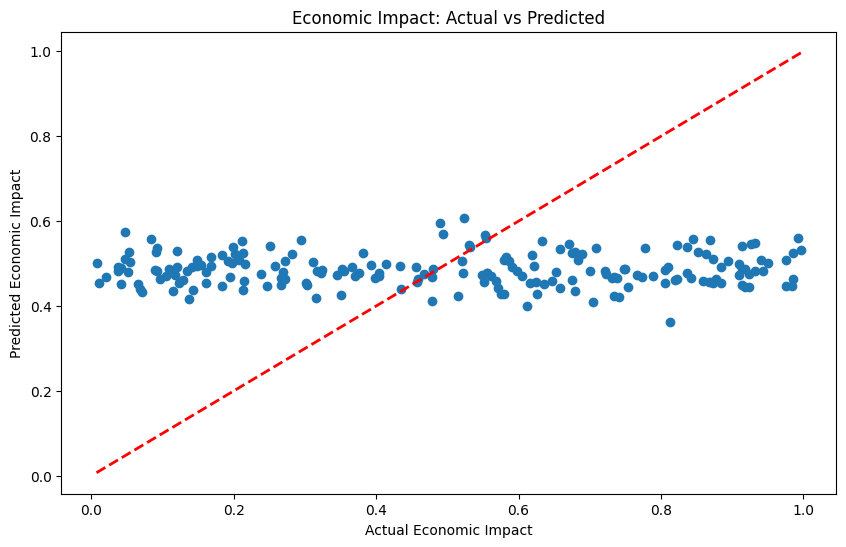


Welcome to the Economic Impact Quiz!

Question 1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/Users/rajesh/Desktop/Code/NASA/7-SD/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Based on the following environmental conditions:
Wildfire Intensity: 0.49
Air Quality Index: 0.22
Water Resource Level: 0.76

What is the most likely economic impact?

A) Severe economic downturn (>$0.62 billion)
B) Moderate economic impact ($0.41 - $0.62 billion)
C) Minor economic effect ($0.26 - $0.41 billion)
D) Negligible economic impact (<$0.26 billion)
Incorrect. The correct answer is B.

Question 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/Users/rajesh/Desktop/Code/NASA/7-SD/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Based on the following environmental conditions:
Wildfire Intensity: 0.40
Air Quality Index: 0.96
Water Resource Level: 0.94

What is the most likely economic impact?

A) Severe economic downturn (>$0.62 billion)
B) Moderate economic impact ($0.41 - $0.62 billion)
C) Minor economic effect ($0.26 - $0.41 billion)
D) Negligible economic impact (<$0.26 billion)
Incorrect. The correct answer is B.

Question 3:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/Users/rajesh/Desktop/Code/NASA/7-SD/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Based on the following environmental conditions:
Wildfire Intensity: 0.20
Air Quality Index: 0.01
Water Resource Level: 0.37

What is the most likely economic impact?

A) Severe economic downturn (>$0.68 billion)
B) Moderate economic impact ($0.45 - $0.68 billion)
C) Minor economic effect ($0.28 - $0.45 billion)
D) Negligible economic impact (<$0.28 billion)
Incorrect. The correct answer is B.

Question 4:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/Users/rajesh/Desktop/Code/NASA/7-SD/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Given the current environmental conditions, the economic impact is likely to be moderate, less than $5 billion.
Incorrect. The correct answer is False.

Question 5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/Users/rajesh/Desktop/Code/NASA/7-SD/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Given the current environmental conditions, the economic impact is likely to be moderate, less than $5 billion.
Correct!

Quiz completed! Your score: 1/5


In [9]:
if __name__ == "__main__":
    # Fetch data (simulated for this example)
    data_dict = {key: pd.DataFrame(np.random.rand(1000, 3), columns=['feature1', 'feature2', 'feature3']) for key in nasa_urls}
    data_dict['economic_indicators'] = pd.DataFrame(np.random.rand(1000, 1), columns=['economic_impact'])
    
    # Preprocess data
    X_train, X_test, y_train, y_test, scaler = preprocess_data(data_dict)
    
    # Create and train model
    model = create_model((X_train.shape[1], 1))
    history = train_model(model, X_train, y_train)
    
    # Evaluate model
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test MAE: ${test_mae:.2f} billion")
    
    # Visualize predictions
    plot_predictions(model, X_test, y_test)
    
    # Take the quiz
    print("\nWelcome to the Economic Impact Quiz!")
    take_quiz(model, scaler)

## 9. Additional Information


In [10]:
def display_nasa_resources():
    print("\nNASA Resources for Further Learning:")
    print("1. EIC Gallery: Interactive visualizations of climate indicators")
    print("2. Data Pathfinders: Guide to NASA Earth science datasets")
    print("3. Images of Change: Visual documentation of Earth's changing state")
    print("4. NASA Earth System Interconnections Video")
    print("5. Earth Information Center (EIC)")
    print("\nPartner Resources:")
    print("6. ESA Sentinel-3 World Fire Atlas")
    print("7. EO Dashboard Story on Australian Wildfires")
    print("8. FireSmoke Canada Portal")
    print("9. MOPITT: Measurements of Pollution in the Troposphere")
    print("10. Surface Water and Ocean Topography (SWOT) mission information")

if __name__ == "__main__":
    display_nasa_resources()
    print("\nFor more detailed information, visit NASA's Earth Science Division website.")


NASA Resources for Further Learning:
1. EIC Gallery: Interactive visualizations of climate indicators
2. Data Pathfinders: Guide to NASA Earth science datasets
3. Images of Change: Visual documentation of Earth's changing state
4. NASA Earth System Interconnections Video
5. Earth Information Center (EIC)

Partner Resources:
6. ESA Sentinel-3 World Fire Atlas
7. EO Dashboard Story on Australian Wildfires
8. FireSmoke Canada Portal
9. MOPITT: Measurements of Pollution in the Troposphere
10. Surface Water and Ocean Topography (SWOT) mission information

For more detailed information, visit NASA's Earth Science Division website.
